In [0]:
### Import libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
# from mpl_toolkits.mplot3d import Axes3D
import scipy 
# import re
import os, sys
import pickle
# import matplotlib.dates
# import sqlite3
# import sqlalchemy

# import warnings
# from datetime import datetime
# from tabulate import tabulate



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
%matplotlib inline

In [0]:
MY_PATH = "drive/My Drive/github/erdos_project/"
# df_all = pd.read_csv(MY_PATH+"clean.csv", index_col=0)

In [0]:
# df = pd.read_excel(MY_PATH+"Acme.xlsx", index_col=0)
df = pd.read_csv(MY_PATH+"clean.csv", index_col=0)

# Compute cost per customer

In [0]:
# Currently, the cost per customer acquired is: 
df['click'].sum()*10/(df['policies sold'].sum())

25.211009174311926

# Get data to feed into network

In [0]:
def select(df, insured, nv, nd, m, r): 
    return df.loc[(df['currently_insured']==insured) & 
                  (df['number_of_drivers']==nd) & 
                  (df['number_of_vehicles']==nv) & 
                  (df['married']==m) & 
                  (df['rank']==r)]

In [0]:
g1 = df[['currently_insured','number_of_vehicles','number_of_drivers','married','rank']]\
    .groupby(['currently_insured','number_of_vehicles','number_of_drivers','married','rank'])\
    .size().unstack(fill_value=0)
g2 = df[['currently_insured','number_of_vehicles','number_of_drivers','married']]\
    .groupby(['currently_insured','number_of_vehicles','number_of_drivers','married']).size()
rename_dict = {0:'TotalNum'}
for r in range(1,6): 
  rename_dict[r] = 'Rank'+str(r)
df_rank_sum = pd.concat([g1,g2], axis=1).rename(columns=rename_dict)

In [0]:
for r in range(1,6): 
  df_rank_sum['Rank'+str(r)] = df_rank_sum['Rank'+str(r)]/df_rank_sum['TotalNum']

In [0]:
df_rank_sum

Rank1  ...  TotalNum
currently_insured number_of_vehicles number_of_drivers married            ...          
0                 1                  1                 0        0.179487  ...        39
                                                       1        0.210456  ...       746
                                     2                 0        0.495606  ...       569
                                                       1        0.510673  ...       609
                  2                  1                 0        0.000000  ...       111
                                                       1        0.000000  ...      2013
                                     2                 0        0.000000  ...       484
                                                       1        0.000000  ...       437
1                 1                  1                 0        0.282051  ...        39
                                                       1        0.209809  ...       734
                                     2                 0        0.182283  ...       587
                                                       1        0.173401  ...       594
                  2                  1                 0        0.000000  ...        93
                                                       1        0.000000  ...      2056
                                     2                 0        0.000000  ...       451
                                                       1        0.000000  ...       438

[16 rows x 6 columns]

In [0]:
actual_prob_click

array([[0.57142857, 0.2       , 0.1       , 0.        ,        nan],
       [0.50955414, 0.21538462, 0.14767932, 0.03821656,        nan],
       [0.5141844 , 0.20689655, 0.19469027,        nan,        nan],
       [0.48874598, 0.16149068, 0.08759124,        nan,        nan],
       [       nan,        nan, 0.04761905, 0.12121212, 0.01754386],
       [       nan,        nan, 0.16756757, 0.03154574, 0.02477701],
       [       nan, 0.17525773, 0.125     , 0.03100775, 0.01020408],
       [       nan, 0.19354839, 0.12307692, 0.03937008, 0.02298851],
       [0.63636364, 0.25      , 0.        , 0.07142857,        nan],
       [0.5       , 0.1372549 , 0.14732143, 0.05921053,        nan],
       [0.52336449, 0.18994413, 0.13661202, 0.05084746,        nan],
       [0.58252427, 0.20858896, 0.18556701, 0.03731343,        nan],
       [       nan,        nan, 0.29411765, 0.08      , 0.        ],
       [       nan,        nan, 0.16296296, 0.04605263, 0.01629914],
       [       nan, 0.13793103, 0.

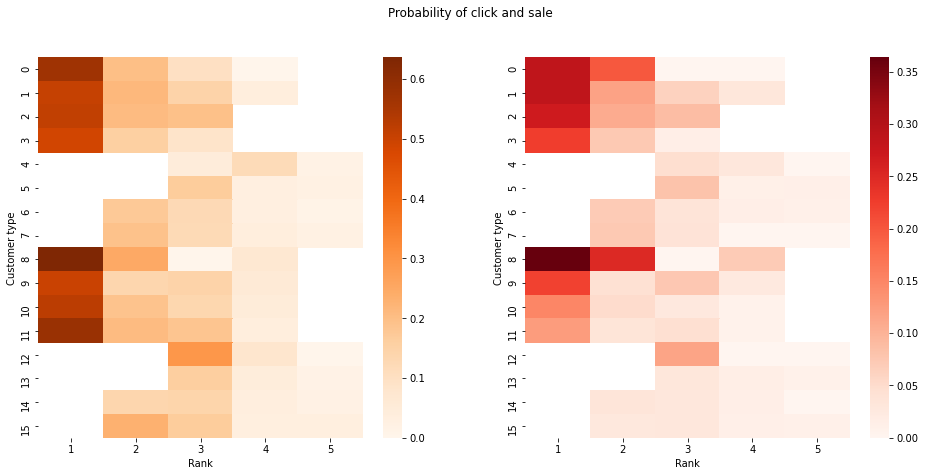

In [0]:
f, ax = plt.subplots(1,2,figsize=(16,7))
sns.heatmap(actual_prob_click, mask=np.isnan(actual_prob_click), cmap='Oranges', ax=ax[0])
sns.heatmap(actual_prob_sale, mask=np.isnan(actual_prob_sale), cmap='Reds', ax=ax[1])
ax[0].set_xticklabels(range(1,6))
ax[1].set_xticklabels(range(1,6))
ax[0].set_xlabel('Rank')
ax[1].set_xlabel('Rank')
ax[0].set_ylabel('Customer type')
ax[1].set_ylabel('Customer type')
f.suptitle("Probability of click and sale")
plt.show()

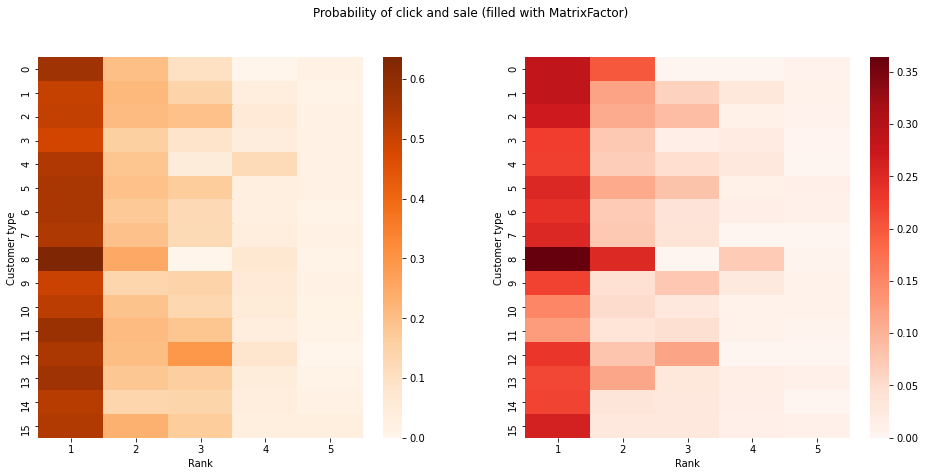

In [0]:
f, ax = plt.subplots(1,2,figsize=(16,7))
sns.heatmap(prob_click_fillna,cmap='Oranges', ax=ax[0])
sns.heatmap(prob_sale_fillna, cmap='Reds', ax=ax[1])
ax[0].set_xticklabels(range(1,6))
ax[1].set_xticklabels(range(1,6))
ax[0].set_xlabel('Rank')
ax[1].set_xlabel('Rank')
ax[0].set_ylabel('Customer type')
ax[1].set_ylabel('Customer type')
f.suptitle("Probability of click and sale (filled with MatrixFactor)")
plt.show()

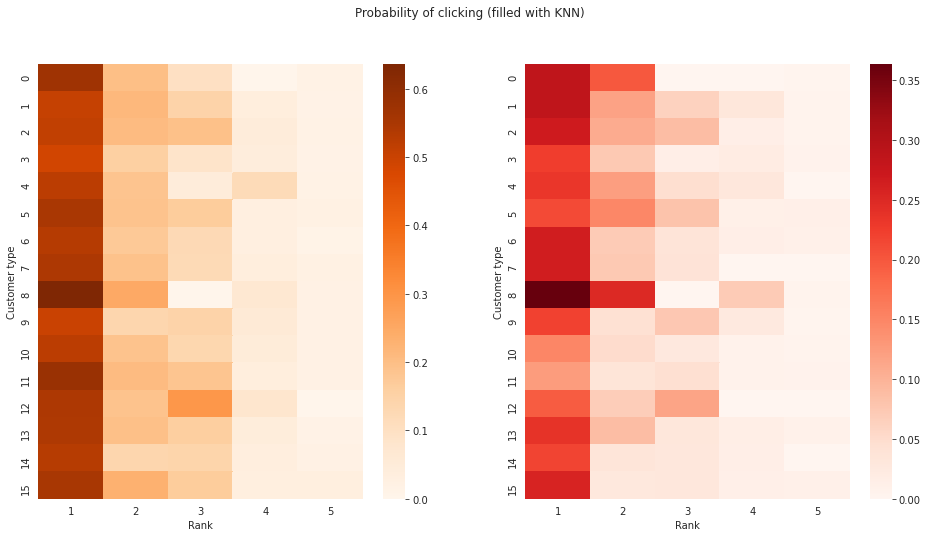

In [0]:
f, ax = plt.subplots(1,2,figsize=(16,8))
sns.heatmap(prob_click_fillna,cmap='Oranges', ax=ax[0])
sns.heatmap(prob_sale_fillna, cmap='Reds', ax=ax[1])
ax[0].set_xticklabels(range(1,6))
ax[1].set_xticklabels(range(1,6))
ax[0].set_xlabel('Rank')
ax[1].set_xlabel('Rank')
ax[0].set_ylabel('Customer type')
ax[1].set_ylabel('Customer type')
f.suptitle("Probability of clicking (filled with KNN)")
plt.show()

In [0]:
# with open("/content/drive/My Drive/Colab Notebooks/rank_distribution.pickle", 'wb') as f:
    # pickle.dump(df_rank_sum.reset_index().iloc[:,4:9].to_numpy(), f)
df_rank_sum.reset_index().iloc[:,4:].to_csv("/content/drive/My Drive/Colab Notebooks/rank_distribution.csv")

In [0]:
df_rank_sum.reset_index()['TotalNum'].to_numpy()/10000

array([0.0039, 0.0746, 0.0569, 0.0609, 0.0111, 0.2013, 0.0484, 0.0437,
       0.0039, 0.0734, 0.0587, 0.0594, 0.0093, 0.2056, 0.0451, 0.0438])

From here, we see that we are doing signigicantly worse in the category with ```currently_insured==1, number_of_drivers==2, number_of_vehicles==1```.
Question: is this category profitable? 

## Look at the decay of clicking and buying probabilities as rank incrases

In [0]:
temp = pd.concat([ df[['rank', 'click']].groupby('rank').agg(lambda x: np.std(x)).rename(columns={'click':'std'}), 
           df[['rank', 'click']].groupby('rank').mean().rename(columns={'click':'prob'})], axis=1)

In [0]:
from sklearn.linear_model import LinearRegression
x = np.array(range(1,6)).reshape(-1,1)
exp_x = np.exp(-x)
# exp_2x = exp_x*exp_x
# x3 = x2*x
# x4 = x3*x
linear_reg = LinearRegression().fit(np.concatenate([x,exp_x], axis=1), temp['prob'])

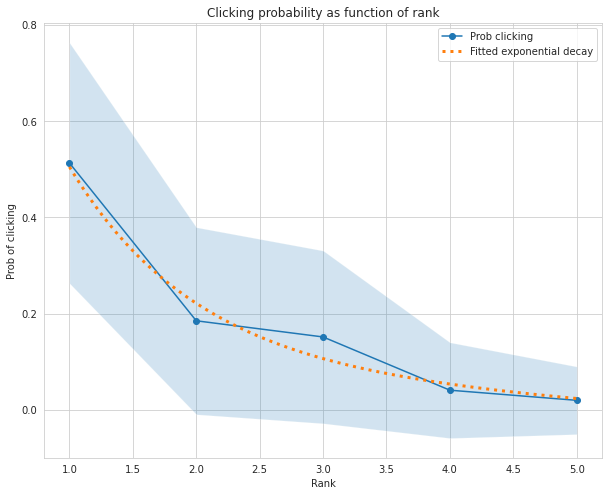

In [0]:
f = plt.figure(figsize=(10, 8))
plt.plot(range(1,6), temp['prob'], marker='o', label='Prob clicking')
plt.plot(x, poly, linestyle=':', linewidth=3.0, label='Fitted exponential decay')
plt.fill_between(range(1,6), temp['prob']-.5*temp['std'], temp['prob']+.5*temp['std'], alpha=.2)
plt.xlabel('Rank')
plt.ylabel('Prob of clicking')
plt.title('Clicking probability as function of rank')
plt.legend()
plt.show()

In [0]:
x = np.array(np.linspace(1,5,100))
exp_x = np.exp(-x)

# x2 = x*x
# x3 = x2*x
# x4 = x3*x
# exp_2x = exp_x*exp_x

# poly = linear_reg.intercept_ + linear_reg.coef_[0]*x + linear_reg.coef_[1]*x2 + linear_reg.coef_[2]*x3+ linear_reg.coef_[3]*x4
poly = linear_reg.intercept_ + linear_reg.coef_[0]*x + linear_reg.coef_[1]*exp_x 

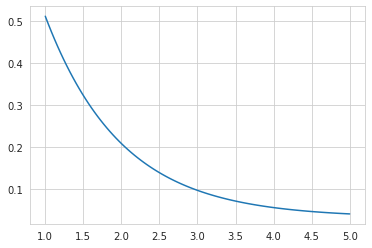

In [0]:
temp = pd.concat([ df[['rank', 'policies sold']].groupby('rank').agg(lambda x: np.std(x)).rename(columns={'policies sold':'std'}), 
           df[['rank', 'policies sold']].groupby('rank').mean().rename(columns={'policies sold':'prob'})], axis=1)

In [0]:
from sklearn.linear_model import LinearRegression
x = np.array(range(1,6)).reshape(-1,1)
exp_x = np.exp(-x)
# exp_2x = exp_x*exp_x
# x3 = x2*x
# x4 = x3*x
linear_reg = LinearRegression().fit(np.concatenate([x,exp_x], axis=1), temp['prob'])

In [0]:
x = np.array(np.linspace(1,5,100))
exp_x = np.exp(-x)

# x2 = x*x
# x3 = x2*x
# x4 = x3*x
# exp_2x = exp_x*exp_x

# poly = linear_reg.intercept_ + linear_reg.coef_[0]*x + linear_reg.coef_[1]*x2 + linear_reg.coef_[2]*x3+ linear_reg.coef_[3]*x4
poly = linear_reg.intercept_ + linear_reg.coef_[0]*x + linear_reg.coef_[1]*exp_x 

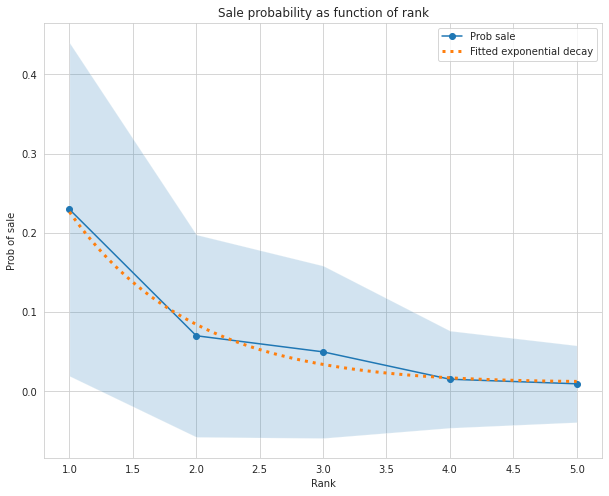

In [0]:
f = plt.figure(figsize=(10, 8))
plt.plot(range(1,6), temp['prob'], marker='o', label='Prob sale')
plt.plot(x, poly, linestyle=':', linewidth=3.0, label='Fitted exponential decay')
plt.fill_between(range(1,6), temp['prob']-.5*temp['std'], temp['prob']+.5*temp['std'], alpha=.2)
plt.xlabel('Rank')
plt.ylabel('Prob of sale')
plt.title('Sale probability as function of rank')
plt.legend()
plt.show()

## Question: Does probability of clicking depend on viewer's insurance status, num_of_drivers, num_of_vehicles?

In [0]:
df[['currently_insured','number_of_drivers','number_of_vehicles','click']].groupby(['currently_insured','number_of_drivers','number_of_vehicles']).mean()

click
currently_insured number_of_drivers number_of_vehicles          
0                 1                 1                   0.216561
                                    2                   0.053202
                  2                 1                   0.333616
                                    2                   0.090119
1                 1                 1                   0.203105
                                    2                   0.054909
                  2                 1                   0.216765
                                    2                   0.094488

It appears that people with only 1 vehicle is more likely to click on our ad. Let's test this hypothesis controlling for rank etc. 

In [0]:
for r in range(1,6): 
  d0 = df[(df['rank']==r) & (df['number_of_vehicles']==1)]['click']
  d1 = df[(df['rank']==r) & (df['number_of_vehicles']==2)]['click']
  t_test_result = scipy.stats.ttest_ind(d0,d1, equal_var = False)
  t_stat = t_test_result[0]
  p_val = t_test_result[1]
  print("When we rank {}, p val is {}.".format(r,p_val))

When we rank 1, p val is nan.
When we rank 2, p val is 0.8542085992341869.
When we rank 3, p val is 0.6834419198349218.
When we rank 4, p val is 0.5180143827757095.
When we rank 5, p val is nan.


Interesting, we got some nan. Apparently the difference is due to our rank, rather than how many cars a person owns. 

In [0]:
g1 = df.groupby(['rank','currently_insured','number_of_drivers','number_of_vehicles','married']).mean()
g2 = df.groupby(['rank','currently_insured','number_of_drivers','number_of_vehicles','married']).size()#.unstack(fill_value=0)
# g2 = df[['currently_insured','number_of_drivers','number_of_vehicles','married']]\
#     .groupby(['currently_insured','number_of_drivers','number_of_vehicles']).size()
# rename_dict = {0:'TotalNum'}
# for r in range(1,6): 
#   rename_dict[r] = 'Rank'+str(r)
# df_rank_sum = pd.concat([g1,g2], axis=1).rename(columns=rename_dict)

In [0]:
pd.concat([g1,g2], axis=1)

click  ...     0
rank currently_insured number_of_drivers number_of_vehicles married            ...      
1    0                 1                 1                  0        0.571429  ...     7
                                                            1        0.509554  ...   157
                       2                 1                  0        0.514184  ...   282
                                                            1        0.488746  ...   311
     1                 1                 1                  0        0.636364  ...    11
                                                            1        0.500000  ...   154
                       2                 1                  0        0.523364  ...   107
                                                            1        0.582524  ...   103
2    0                 1                 1                  0        0.200000  ...    10
                                                            1        0.215385  ...   195
                       2                 1                  0        0.206897  ...   174
                                                            1        0.161491  ...   161
                                         2                  0        0.175258  ...    97
                                                            1        0.193548  ...    93
     1                 1                 1                  0        0.250000  ...     8
                                                            1        0.137255  ...   204
                       2                 1                  0        0.189944  ...   179
                                                            1        0.208589  ...   163
                                         2                  0        0.137931  ...    87
                                                            1        0.231884  ...    69
3    0                 1                 1                  0        0.100000  ...    10
                                                            1        0.147679  ...   237
                                         2                  0        0.047619  ...    21
                                                            1        0.167568  ...   370
                       2                 1                  0        0.194690  ...   113
                                                            1        0.087591  ...   137
                                         2                  0        0.125000  ...   160
                                                            1        0.123077  ...   130
     1                 1                 1                  0        0.000000  ...     6
                                                            1        0.147321  ...   224
                                         2                  0        0.294118  ...    17
                                                            1        0.162963  ...   405
                       2                 1                  0        0.136612  ...   183
                                                            1        0.185567  ...   194
                                         2                  0        0.143939  ...   132
                                                            1        0.167939  ...   131
4    0                 1                 1                  0        0.000000  ...    12
                                                            1        0.038217  ...   157
                                         2                  0        0.121212  ...    33
                                                            1        0.031546  ...   634
                       2                 2                  0        0.031008  ...   129
                                                            1        0.039370  ...   127
     1                 1                 1                  0        0.071429  ...    14
                                                            1      

In [0]:
temp = df.loc[(df['currently_insured']==0) & (df['number_of_drivers']==1) & (df['number_of_vehicles']==1) & (df['married']==1)]

In [0]:
len(temp)

746

In [0]:
temp[['click', 'policies sold', 'rank']].groupby('rank').mean()

,click,policies sold
rank,,
1,0.509554,0.286624
2,0.215385,0.117949
3,0.147679,0.063291
4,0.038217,0.031847


In [0]:
df[['click', 'policies sold', 'rank']].groupby('rank').mean()

,click,policies sold
rank,,
1,0.513251,0.229682
2,0.185417,0.070139
3,0.151822,0.049798
4,0.041203,0.015245
5,0.020150,0.009482


## Question: Does probability of clicking depend on the viewer's marital status? 

Let's see the overall result first. 

In [0]:
  d0 = df[ (df['married']==0)]['click']
  d1 = df[ (df['married']==1)]['click']
  t_test_result = scipy.stats.ttest_ind(d0,d1, equal_var = False)
  t_stat = t_test_result[0]
  p_val = t_test_result[1]
  print("Overall, the p val is {}.\n".format(p_val))
  print("The prob of clicking for each group is:\n")
  print(df[['married', 'click']].groupby('married').mean().rename(columns={'click':'ProbOfClick'}))
  print("\nThat is, single people are more likely to click on ads!")

Overall, the p val is 1.3158205615784851e-11.

The prob of clicking for each group is:
		
         ProbOfClick
married             
0           0.182891
1           0.123246

That is, single people are more likely to click on ads!


It seems that single people are more likely to click on ads! However, let's control on the rank of our ad. 

In [0]:
g = df[['click', 'rank','married']].groupby(['rank','married'])
pd.concat([g.mean().rename(columns={'click':'ProbOfClick'}), g.count().rename(columns={'click':'NumOfClick'})], axis=1)

ProbOfClick  NumOfClick
rank married                         
1    0           0.520885         407
     1           0.508966         725
2    0           0.185586         555
     1           0.185311         885
3    0           0.144860         642
     1           0.154267        1828
4    0           0.047109         467
     1           0.039796        1960
5    0           0.013245         302
     1           0.021086        2229

It looks like there is no difference between the two groups, after controlling for our rank... Let's run a t-test to be sure. 

In [0]:
for r in range(1,6): 
  d0 = df[(df['rank']==r) & (df['married']==0)]['click']
  d1 = df[(df['rank']==r) & (df['married']==1)]['click']
  t_test_result = scipy.stats.ttest_ind(d0,d1, equal_var = False)
  t_stat = t_test_result[0]
  p_val = t_test_result[1]
  print("When we rank {}, p val is {}.".format(r,p_val))

When we rank 1, p val is 0.7005511385522003.
When we rank 2, p val is 0.9895903684276275.
When we rank 3, p val is 0.5632141470085206.
When we rank 4, p val is 0.4970557769588114.
When we rank 5, p val is 0.28063908324530373.


We utilize a t-test. And the result is that the probability of clicking does NOT depend on the viewer's marital status. 

## Question: After clicking on ad, does the viewer's purchase decision depend on our rank? 

In [0]:
clicked = df[df['click']==1]

In [0]:
g = clicked[['policies sold','rank','married']].groupby(['rank','married'])
pd.concat([g.mean().rename(columns={'policies sold':"ProbOfBuy"}), g.count().rename(columns={'policies sold':"NumOfBuy"})], axis=1)

ProbOfBuy  NumOfBuy
rank married                     
1    0         0.462264       212
     1         0.439024       369
2    0         0.407767       103
     1         0.359756       164
3    0         0.301075        93
     1         0.336879       282
4    0         0.318182        22
     1         0.384615        78
5    0         0.250000         4
     1         0.489362        47

In [0]:
var = 'currently_insured'
g = clicked[['policies sold','rank',var]].groupby(['rank',var])
pd.concat([g.mean().rename(columns={'policies sold':"ProbOfBuy"}), g.count().rename(columns={'policies sold':"NumOfBuy"})], axis=1)

ProbOfBuy  NumOfBuy
rank currently_insured                     
1    0                   0.506562       381
     1                   0.335000       200
2    0                   0.496454       141
     1                   0.246032       126
3    0                   0.408284       169
     1                   0.262136       206
4    0                   0.410256        39
     1                   0.344262        61
5    0                   0.482759        29
     1                   0.454545        22

In [0]:
for r in range(1,6): 
  
  d0 = clicked[(clicked['rank']==r) & (clicked['married']==0)]['policies sold']
  d1 = clicked[(clicked['rank']==r) & (clicked['married']==1)]['policies sold']
  t_test_result = scipy.stats.ttest_ind(d0,d1, equal_var = False)
  t_stat = t_test_result[0]
  p_val = t_test_result[1]
  print("When we rank {}, p val is {}.".format(r,p_val))

When we rank 1, p val is 0.5889867254435269.
When we rank 2, p val is 0.43577106709030844.
When we rank 3, p val is 0.5199052138411727.
When we rank 4, p val is 0.5698203136615492.
When we rank 5, p val is 0.4165926622250802.


What if we didn't control on marital status? 

In [0]:
threshold = 1
d0 = clicked[clicked['rank']<=threshold]['policies sold']
d1 = clicked[clicked['rank']>threshold]['policies sold']
t_test_result = scipy.stats.ttest_ind(d0,d1, equal_var = False)
t_stat = t_test_result[0]
p_val = t_test_result[1]
print(p_val)

0.0010283578595287363


It is statistically significant that even after controlling for clicking behavior, our previous rank still affects the viewer's purchasing decision. 

# Classification problem

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import log_loss, recall_score, confusion_matrix, \
                            auc, accuracy_score, roc_curve

# Predict prob of clicking

First use one-hot encoding to encode ranking information

In [0]:
df_onehot = pd.concat([df, pd.get_dummies(df['rank'], prefix="rank")], axis=1)

In [0]:
X = df_onehot[['currently_insured', 'number_of_vehicles', 'number_of_drivers', 
               'married', 'rank_1', 'rank_2', 'rank_3', 'rank_4', 'rank_5']]
y = df_onehot['click']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
X_train.head()

,currently_insured,number_of_vehicles,number_of_drivers,married,rank_1,rank_2,rank_3,rank_4,rank_5
impression_id,,,,,,,,,
2318,1,2,1,1,0,0,0,0,1
260,1,1,2,0,0,0,1,0,0
585,1,1,1,1,0,1,0,0,0
476,0,2,1,1,0,0,1,0,0
9157,0,1,2,1,0,0,1,0,0


## Logistic Regression

In [0]:
# X = df[['currently_insured', 'number_of_vehicles', 'number_of_drivers', 
#                'married', 'rank']]
# y = df['click']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
# X_train.head()

,currently_insured,number_of_vehicles,number_of_drivers,married,rank
impression_id,,,,,
2318,1,2,1,1,5
260,1,1,2,0,3
585,1,1,1,1,2
476,0,2,1,1,3
9157,0,1,2,1,3


In [0]:
logiReg = LogisticRegression()
parameters = {'C':np.linspace(.1, .7, 7)}
clf = GridSearchCV(logiReg, parameters, cv=5, scoring='roc_auc')
clf.fit(X_train, y_train)
print(clf.best_params_)
logiReg = clf.best_estimator_

{'C': 0.4}


In [0]:
y_test_pred = logiReg.predict_proba(X_test)[:,1]
y_train_pred = logiReg.predict_proba(X_train)[:,1]

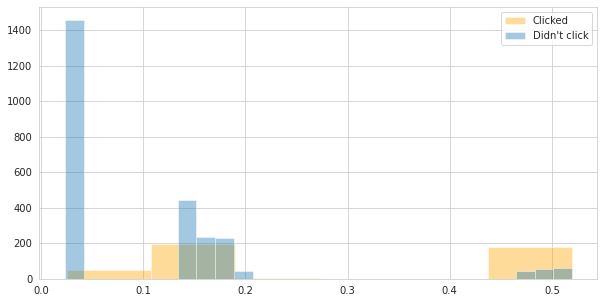

In [0]:
# sns.set()
f = plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
ax2 = sns.distplot(y_test_pred[y_test==1], color='orange', kde=False, label="Clicked")
ax1 = sns.distplot(y_test_pred[y_test==0], kde=False, label="Didn't click")
plt.legend()

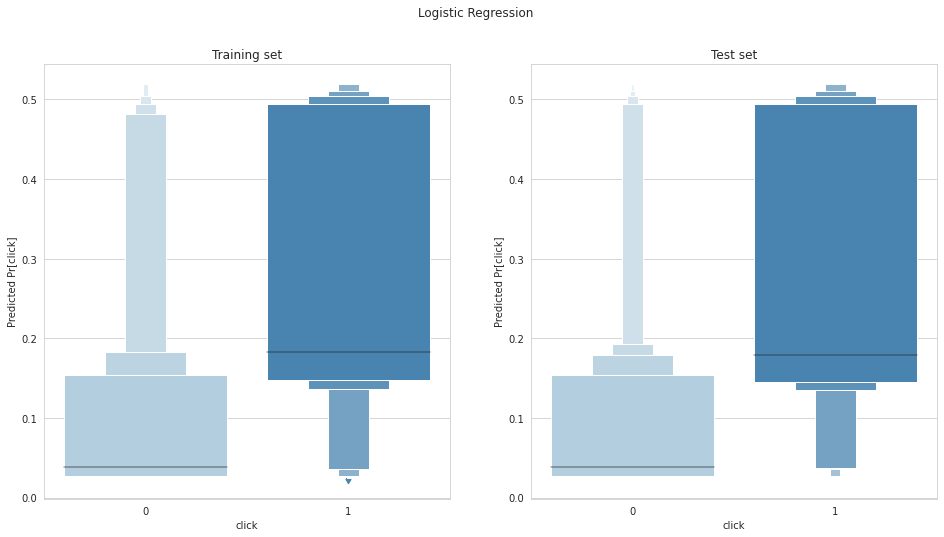

In [0]:
# sns.violinplot(x=y_test, y=y_pred_logi)
f, ax = plt.subplots(1,2,figsize=(16,8))
sns.boxenplot(x=y_train, y=y_train_pred, palette="Blues", ax=ax[0])
ax[0].set_title('Training set')
# plt.ylabel("Predicted Pr[click]")
ax[0].set_ylabel("Predicted Pr[click]")
sns.boxenplot(x=y_test, y=y_test_pred, palette="Blues", ax=ax[1])
ax[1].set_title('Test set')
ax[1].set_ylabel("Predicted Pr[click]")
f.suptitle("Logistic Regression")
plt.show()

In [0]:
input_matrix = []
for ins in [0,1]:
    for nv in [1,2]:
        for nd in [1,2]:
            for ma in [0,1]:
                for r in range(1,6):
                    input_matrix.append([ins,nv,nd,ma,r])
df_customer_types = pd.DataFrame(data=input_matrix, columns=['ins', 'nv', 'nd', 'm', 'r'])
input_matrix_one_hot = np.concatenate( [np.array(input_matrix)[:,:4], pd.get_dummies(df_customer_types['r']).to_numpy()], axis=1 )

logiReg.predict_proba(input_matrix_one_hot)[:,1]

array([0.49072691, 0.17542023, 0.14088046, 0.03511017, 0.02455196,
       0.50387049, 0.18315589, 0.14736519, 0.0369356 , 0.02584316,
       0.4812543 , 0.17000232, 0.13635291, 0.03384789, 0.02365997,
       0.49439046, 0.1775505 , 0.14266385, 0.03561012, 0.02490546,
       0.4867198 , 0.17311262, 0.13895064, 0.03457092, 0.02417081,
       0.49986139, 0.18076883, 0.14536158, 0.03636937, 0.02544249,
       0.47725205, 0.16775148, 0.13447541, 0.03332736, 0.02329233,
       0.49038224, 0.17522082, 0.14071361, 0.03506347, 0.02451895,
       0.50663509, 0.18481633, 0.14876025, 0.03733103, 0.02612306,
       0.51976988, 0.19286942, 0.15554203, 0.03926724, 0.02749456,
       0.49715517, 0.17917127, 0.14402193, 0.03599189, 0.02517546,
       0.5102984 , 0.18703483, 0.15062591, 0.03786137, 0.02649856,
       0.50262629, 0.18241246, 0.14674094, 0.03675897, 0.02571816,
       0.5157658 , 0.19038527, 0.15344725, 0.0386667 , 0.02706899,
       0.4931464 , 0.1768249 , 0.14205619, 0.0354396 , 0.02478

In [0]:
logiReg.coef_

array([[ 0.06363854, -0.01603667, -0.03792137,  0.05257886,  2.04059885,
         0.53000599,  0.26969908, -1.23582773, -1.6044096 ]])

In [0]:
threshold = .17
y_pred_prob = y_test_pred
y_pred = y_pred_prob > threshold
print('Prob of clicking:', np.mean(y_test), np.mean(y_pred))
print('Log loss:', log_loss(y_test, y_pred_prob))
print('Accuracy score:', accuracy_score(y_test, y_pred))
print("Recall rate:", recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print('AUC metric:', auc(fpr, tpr))

Prob of clicking: 0.144 0.242
Log loss: 0.32833135747387493
Accuracy score: 0.7833333333333333
Recall rate: 0.5879629629629629
AUC metric: 0.8039424865870544


In [0]:
confusion_matrix(y_test, y_pred)

array([[2347,  221],
       [ 244,  188]])

In [0]:
X_train.head(2)

,currently_insured,number_of_vehicles,number_of_drivers,rank,married
impression_id,,,,,
2318,1,2,1,5,1
260,1,1,2,3,0


In [0]:
customer_types = []
for ins in [0,1]:
    for nv in [1,2]:
        for nd in [1,2]:
            for ma in [0,1]:
                    customer_types.append([ins,nv,nd,ma])


In [0]:
import pickle 
with open(MY_PATH+'customer_types.pkl', 'wb') as f:
    pickle.dump(customer_types, f)

In [0]:
prob_click = logiReg.predict_proba(np.array(customer_types))[:,1]

In [0]:
with open(MY_PATH+'prob_click.pkl', 'wb') as f:
    pickle.dump(prob_click, f)

# Predict prob of buying

In [0]:
X = df_onehot[['currently_insured', 'number_of_vehicles', 'number_of_drivers', 
               'married', 'rank_1', 'rank_2', 'rank_3', 'rank_4', 'rank_5']]
y = df_onehot['policies sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
X_train.head()

,currently_insured,number_of_vehicles,number_of_drivers,married,rank_1,rank_2,rank_3,rank_4,rank_5
impression_id,,,,,,,,,
2318,1,2,1,1,0,0,0,0,1
260,1,1,2,0,0,0,1,0,0
585,1,1,1,1,0,1,0,0,0
476,0,2,1,1,0,0,1,0,0
9157,0,1,2,1,0,0,1,0,0


In [0]:
logiReg_sale = LogisticRegression()
parameters = {'C':np.linspace(.1, 1., 10)}
clf = GridSearchCV(logiReg_sale, parameters, cv=5, scoring='roc_auc')
clf.fit(X_train, y_train)
clf.best_params_
logiReg_sale = clf.best_estimator_

In [0]:
y_test_pred_sale = logiReg_sale.predict_proba(X_test)[:,1]
y_train_pred_sale = logiReg_sale.predict_proba(X_train)[:,1]

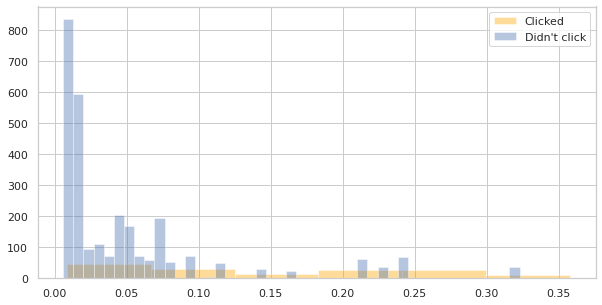

In [0]:
# sns.set()
f = plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
ax2 = sns.distplot(y_test_pred_sale[y_test==1], color='orange', kde=False, label="Clicked")
ax1 = sns.distplot(y_test_pred_sale[y_test==0], kde=False, label="Didn't click")
plt.legend()

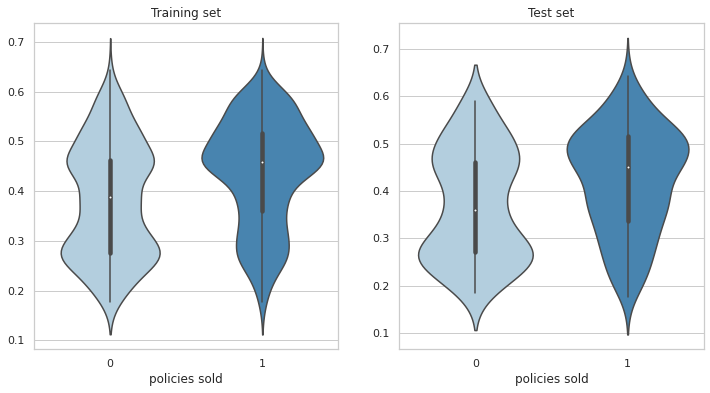

In [0]:
# sns.violinplot(x=y_test, y=y_pred_logi)
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.violinplot(x=y_train, y=y_train_pred_sale, palette="Blues", ax=ax[0])
ax[0].set_title('Training set')
sns.violinplot(x=y_test, y=y_test_pred_sale, palette="Blues", ax=ax[1])
ax[1].set_title('Test set')
plt.show()

Therefore, it's harder to do predictions this way... Let's condition on clicking and see what happens

In [0]:
X = df_onehot[['currently_insured', 'number_of_vehicles', 'number_of_drivers', 
               'married', 'rank_1', 'rank_2', 'rank_3', 'rank_4', 'rank_5']]\
               .loc[df_onehot['click']==1]
y = df_onehot['policies sold'].loc[df_onehot['click']==1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
X_train.head()

,currently_insured,number_of_vehicles,number_of_drivers,married,rank_1,rank_2,rank_3,rank_4,rank_5
impression_id,,,,,,,,,
4125,1,1,2,0,1,0,0,0,0
943,1,1,2,0,0,0,1,0,0
5406,0,1,2,0,1,0,0,0,0
7279,0,1,1,1,1,0,0,0,0
234,0,1,2,1,0,1,0,0,0


In [0]:
logiReg_sale = LogisticRegression()
parameters = {'C':np.linspace(.1, 1., 10)}
clf = GridSearchCV(logiReg_sale, parameters, cv=5, scoring='roc_auc')
clf.fit(X_train, y_train)
clf.best_params_
logiReg_sale = clf.best_estimator_

In [0]:
y_test_pred_sale = logiReg_sale.predict_proba(X_test)[:,1]
y_train_pred_sale = logiReg_sale.predict_proba(X_train)[:,1]

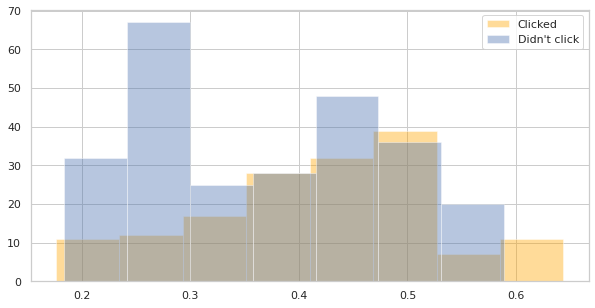

In [0]:
# sns.set()
f = plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
ax2 = sns.distplot(y_test_pred_sale[y_test==1], color='orange', kde=False, label="Clicked")
ax1 = sns.distplot(y_test_pred_sale[y_test==0], kde=False, label="Didn't click")
plt.legend()

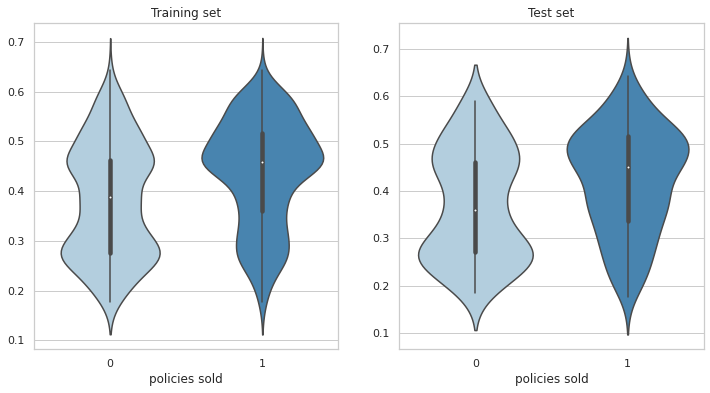

In [0]:
# sns.violinplot(x=y_test, y=y_pred_logi)
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.violinplot(x=y_train, y=y_train_pred_sale, palette="Blues", ax=ax[0])
ax[0].set_title('Training set')
sns.violinplot(x=y_test, y=y_test_pred_sale, palette="Blues", ax=ax[1])
ax[1].set_title('Test set')
plt.show()

In [0]:
np.divide(actual_prob_sale, actual_prob_click)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[0.5       , 1.        , 0.        ,        nan,        nan],
       [0.5625    , 0.54761905, 0.42857143, 0.83333333,        nan],
       [0.52413793, 0.52777778, 0.45454545,        nan,        nan],
       [0.46052632, 0.46153846, 0.16666667,        nan,        nan],
       [       nan,        nan, 1.        , 0.25      , 0.        ],
       [       nan,        nan, 0.48387097, 0.4       , 0.52      ],
       [       nan, 0.41176471, 0.3       , 0.5       , 1.        ],
       [       nan, 0.38888889, 0.3125    , 0.        , 0.        ],
       [0.57142857, 1.        ,        nan, 1.        ,        nan],
       [0.44155844, 0.32142857, 0.51515152, 0.44444444,        nan],
       [0.28571429, 0.26470588, 0.2       , 0.16666667,        nan],
       [0.21666667, 0.17647059, 0.25      , 0.2       ,        nan],
       [       nan,        nan, 0.4       , 0.        ,        nan],
       [       nan,        nan, 0.1969697 , 0.35714286, 0.52941176],
       [       nan, 0.25      , 0.

In [0]:
logiReg_sale.predict_proba(input_matrix_one_hot)[:,1]

array([0.6436016 , 0.61391808, 0.57186   , 0.55977011, 0.66348058,
       0.58918323, 0.55807944, 0.51474653, 0.50244708, 0.61025946,
       0.51610649, 0.48431253, 0.44099165, 0.42889687, 0.53799195,
       0.4585969 , 0.42721788, 0.38518937, 0.3736022 , 0.48046508,
       0.59385175, 0.56283916, 0.51957118, 0.50727696, 0.61484503,
       0.53729826, 0.50556276, 0.46204416, 0.44983662, 0.55904416,
       0.46339785, 0.43195242, 0.3897751 , 0.37813482, 0.48528976,
       0.4068237 , 0.37652353, 0.33655186, 0.32565281, 0.42817557,
       0.44442239, 0.41327291, 0.37172595, 0.36030643, 0.46619669,
       0.38848769, 0.35872729, 0.31967618, 0.30906905, 0.40954163,
       0.32086155, 0.29379277, 0.25895597, 0.24962433, 0.34028998,
       0.27284098, 0.24834196, 0.21723671, 0.20898448, 0.29060593,
       0.39308757, 0.36318408, 0.32389285, 0.31321022, 0.41422194,
       0.33966379, 0.31173691, 0.27560272, 0.26588645, 0.35962784,
       0.27669113, 0.25196619, 0.22054018, 0.21219648, 0.29460

## Actual probability of click and sale

In [0]:
customer_types = []
for ins in [0,1]:
    for nv in [1,2]:
        for nd in [1,2]:
            for ma in [0,1]:
                    customer_types.append([ins,nv,nd,ma])


In [0]:
actual_prob_click = np.zeros((16,5))
actual_sd_click = np.zeros((16,5))
actual_prob_sale = np.zeros((16,5))
actual_sd_sale = np.zeros((16,5))

In [0]:
for i,t in enumerate(customer_types): 
    for rank in range(1,6):
        df_temp = select(df, t[0], t[1], t[2], t[3], rank)
        if len(df_temp)==0: 
            print(customer_types[i])
            actual_prob_click[i, rank-1] = np.nan
            actual_prob_sale[i, rank-1] = np.nan
            actual_sd_click[i, rank-1] = np.nan 
            actual_sd_sale[i, rank-1] = np.nan 
            continue 
        actual_prob_click[i, rank-1] = df_temp['click'].mean()
        actual_prob_sale[i, rank-1] = df_temp['policies sold'].mean()
        actual_sd_click[i, rank-1] = df_temp['click'].std()
        actual_sd_sale[i, rank-1] = df_temp['policies sold'].std()

[0, 1, 1, 0]
[0, 1, 1, 1]
[0, 1, 2, 0]
[0, 1, 2, 0]
[0, 1, 2, 1]
[0, 1, 2, 1]
[0, 2, 1, 0]
[0, 2, 1, 0]
[0, 2, 1, 1]
[0, 2, 1, 1]
[0, 2, 2, 0]
[0, 2, 2, 1]
[1, 1, 1, 0]
[1, 1, 1, 1]
[1, 1, 2, 0]
[1, 1, 2, 1]
[1, 2, 1, 0]
[1, 2, 1, 0]
[1, 2, 1, 1]
[1, 2, 1, 1]
[1, 2, 2, 0]
[1, 2, 2, 1]


In [0]:
print('Probability of sale:')
print(actual_prob_sale)
print("\n Sd of sale:")
print(actual_sd_sale)

Probability of sale:
[[0.28571429 0.2        0.         0.                nan]
 [0.2866242  0.11794872 0.06329114 0.03184713        nan]
 [0.26950355 0.1091954  0.08849558        nan        nan]
 [0.22508039 0.07453416 0.01459854        nan        nan]
 [       nan        nan 0.04761905 0.03030303 0.        ]
 [       nan        nan 0.08108108 0.0126183  0.01288404]
 [       nan 0.07216495 0.0375     0.01550388 0.01020408]
 [       nan 0.07526882 0.03846154 0.         0.        ]
 [0.36363636 0.25       0.         0.07142857        nan]
 [0.22077922 0.04411765 0.07589286 0.02631579        nan]
 [0.14953271 0.05027933 0.0273224  0.00847458        nan]
 [0.12621359 0.03680982 0.04639175 0.00746269        nan]
 [       nan        nan 0.11764706 0.         0.        ]
 [       nan        nan 0.03209877 0.01644737 0.00862895]
 [       nan 0.03448276 0.03030303 0.01470588 0.        ]
 [       nan 0.02898551 0.03053435 0.01351351 0.01111111]]

 Sd of sale:
[[0.48795004 0.42163702 0.         0

In [0]:
np.sqrt(np.multiply(actual_prob_sale, 1-actual_prob_sale))

array([[0.45175395, 0.4       , 0.        , 0.        ,        nan],
       [0.45218444, 0.32254739, 0.24348587, 0.17559298,        nan],
       [0.44370191, 0.31188422, 0.28401427,        nan,        nan],
       [0.41763525, 0.26263819, 0.11993925,        nan,        nan],
       [       nan,        nan, 0.21295885, 0.17141983, 0.        ],
       [       nan,        nan, 0.27295959, 0.11162023, 0.11277431],
       [       nan, 0.25876083, 0.18998355, 0.12354556, 0.10049855],
       [       nan, 0.26382461, 0.19230769, 0.        , 0.        ],
       [0.48104569, 0.4330127 , 0.        , 0.25753938,        nan],
       [0.41477193, 0.20535647, 0.26482661, 0.1600727 ,        nan],
       [0.35661279, 0.21852075, 0.16302114, 0.09166656,        nan],
       [0.33208993, 0.18829459, 0.21033202, 0.0860639 ,        nan],
       [       nan,        nan, 0.32218974, 0.        , 0.        ],
       [       nan,        nan, 0.1762624 , 0.12718826, 0.09249052],
       [       nan, 0.18246561, 0.

In [0]:
mean_prob_click = np.nanmean(actual_prob_click, axis=0)
mean_prob_sale = np.nanmean(actual_prob_sale, axis=0)

In [0]:
print(mean_prob_click)
print(mean_prob_sale)

[0.54077069 0.19234842 0.13948024 0.04833953 0.01824741]
[0.24088554 0.09114893 0.04570232 0.01775862 0.00535352]


In [0]:
for i in range(16):
    for j in range(5): 
        if np.isnan(actual_prob_click[i,j]): 
            actual_prob_click[i,j] = mean_prob_click[j]
        if np.isnan(actual_prob_sale[i,j]): 
            actual_prob_sale[i,j] = mean_prob_sale[j]


In [0]:
print(actual_prob_click)

[[0.57142857 0.2        0.1        0.         0.01824741]
 [0.50955414 0.21538462 0.14767932 0.03821656 0.01824741]
 [0.5141844  0.20689655 0.19469027 0.04833953 0.01824741]
 [0.48874598 0.16149068 0.08759124 0.04833953 0.01824741]
 [0.54077069 0.19234842 0.04761905 0.12121212 0.01754386]
 [0.54077069 0.19234842 0.16756757 0.03154574 0.02477701]
 [0.54077069 0.17525773 0.125      0.03100775 0.01020408]
 [0.54077069 0.19354839 0.12307692 0.03937008 0.02298851]
 [0.63636364 0.25       0.         0.07142857 0.01824741]
 [0.5        0.1372549  0.14732143 0.05921053 0.01824741]
 [0.52336449 0.18994413 0.13661202 0.05084746 0.01824741]
 [0.58252427 0.20858896 0.18556701 0.03731343 0.01824741]
 [0.54077069 0.19234842 0.29411765 0.08       0.        ]
 [0.54077069 0.19234842 0.16296296 0.04605263 0.01629914]
 [0.54077069 0.13793103 0.14393939 0.03676471 0.02083333]
 [0.54077069 0.23188406 0.16793893 0.03378378 0.03333333]]


In [0]:
for i in range(16): 
    print( '[{},{},{},{},{}]'.format(actual_prob_click[i][0],
                                     actual_prob_click[i][1],
                                     actual_prob_click[i][2],
                                     actual_prob_click[i][3],
                                     actual_prob_click[i][4]) )


[0.5714285714285714,0.2,0.1,0.0,0.018247407217204643]
[0.5095541401273885,0.2153846153846154,0.14767932489451477,0.03821656050955414,0.018247407217204643]
[0.5141843971631206,0.20689655172413793,0.19469026548672566,0.04833952594122306,0.018247407217204643]
[0.4887459807073955,0.16149068322981366,0.08759124087591241,0.04833952594122306,0.018247407217204643]
[0.5407706854520101,0.19234842124517404,0.047619047619047616,0.12121212121212122,0.017543859649122806]
[0.5407706854520101,0.19234842124517404,0.16756756756756758,0.031545741324921134,0.024777006937561942]
[0.5407706854520101,0.17525773195876287,0.125,0.031007751937984496,0.01020408163265306]
[0.5407706854520101,0.1935483870967742,0.12307692307692308,0.03937007874015748,0.022988505747126436]
[0.6363636363636364,0.25,0.0,0.07142857142857142,0.018247407217204643]
[0.5,0.13725490196078433,0.14732142857142858,0.05921052631578947,0.018247407217204643]
[0.5233644859813084,0.18994413407821228,0.1366120218579235,0.05084745762711865,0.0182474

In [0]:
for i in range(16): 
    print( '[{},{},{},{},{}]'.format(actual_prob_sale[i][0],
                                     actual_prob_sale[i][1],
                                     actual_prob_sale[i][2],
                                     actual_prob_sale[i][3],
                                     actual_prob_sale[i][4]) )


[0.2857142857142857,0.2,0.0,0.0,0.005353523911122019]
[0.28662420382165604,0.11794871794871795,0.06329113924050633,0.03184713375796178,0.005353523911122019]
[0.2695035460992908,0.10919540229885058,0.08849557522123894,0.017758623184861884,0.005353523911122019]
[0.22508038585209003,0.07453416149068323,0.014598540145985401,0.017758623184861884,0.005353523911122019]
[0.2408855385520363,0.09114892549015914,0.047619047619047616,0.030303030303030304,0.0]
[0.2408855385520363,0.09114892549015914,0.08108108108108109,0.012618296529968454,0.01288404360753221]
[0.2408855385520363,0.07216494845360824,0.0375,0.015503875968992248,0.01020408163265306]
[0.2408855385520363,0.07526881720430108,0.038461538461538464,0.0,0.0]
[0.36363636363636365,0.25,0.0,0.07142857142857142,0.005353523911122019]
[0.22077922077922077,0.04411764705882353,0.07589285714285714,0.02631578947368421,0.005353523911122019]
[0.14953271028037382,0.05027932960893855,0.0273224043715847,0.00847457627118644,0.005353523911122019]
[0.1262135

## Ensemble learning

In [0]:
gb_clf = GradientBoostingClassifier()
parameters = {'learning_rate':np.linspace(.1, .5, 3), 'max_depth':[3,4,5]}
clf = GridSearchCV(gb_clf, parameters, cv=5, scoring='roc_auc')
clf.fit(X_train, y_train)
print(clf.best_params_)
gb_clf = clf.best_estimator_

{'learning_rate': 0.1, 'max_depth': 3}


In [0]:
y_pred_gb = gb_clf.predict_proba(X_test)[:,1]

In [0]:
threshold = .2
y_pred_prob = y_pred_gb
y_pred = y_pred_gb > threshold
print('Prob of clicking:', np.mean(y_test), np.mean(y_pred))
print('Log loss:', log_loss(y_test, y_pred_prob))
print('Accuracy score:', accuracy_score(y_test, y_pred))
print("Recall rate:", recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print('AUC metric:', auc(fpr, tpr))

Prob of clicking: 0.144 0.15566666666666668
Log loss: 0.3287905144213857
Accuracy score: 0.835
Recall rate: 0.4675925925925926
AUC metric: 0.8022027698453905


In [0]:
y_test_pred = gb_clf.predict_proba(X_test)[:,1]
y_train_pred = gb_clf.predict_proba(X_train)[:,1]

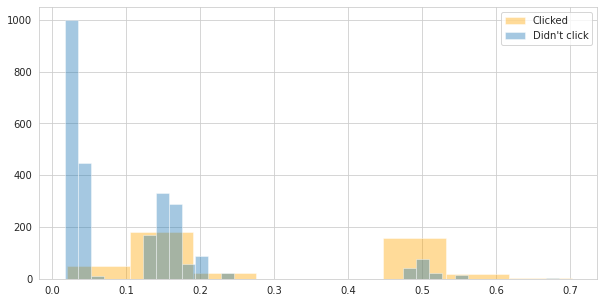

In [0]:
# sns.set()
f = plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
ax2 = sns.distplot(y_test_pred[y_test==1], color='orange', kde=False, label="Clicked")
ax1 = sns.distplot(y_test_pred[y_test==0], kde=False, label="Didn't click")
plt.legend()

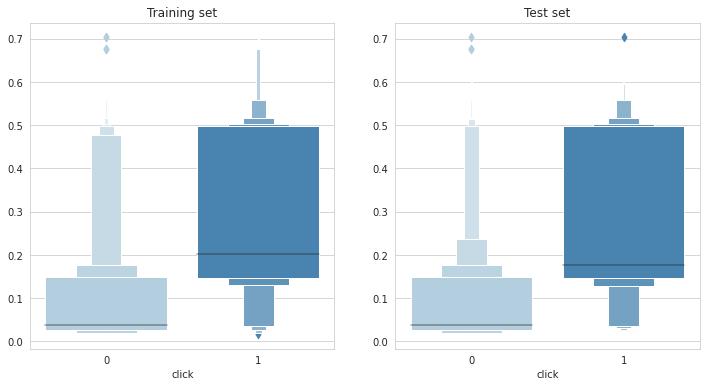

In [0]:
# sns.violinplot(x=y_test, y=y_pred_logi)
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.boxenplot(x=y_train, y=y_train_pred, palette="Blues", ax=ax[0])
ax[0].set_title('Training set')
sns.boxenplot(x=y_test, y=y_test_pred, palette="Blues", ax=ax[1])
ax[1].set_title('Test set')
plt.show()

In [0]:
input_matrix = []
for ins in [0,1]:
    for nv in [1,2]:
        for nd in [1,2]:
            for ma in [0,1]:
                for r in range(1,6):
                    input_matrix.append([ins,nv,nd,ma,r])
df_customer_types = pd.DataFrame(data=input_matrix, columns=['ins', 'nv', 'nd', 'm', 'r'])
input_matrix_one_hot = np.concatenate( [np.array(input_matrix)[:,:4], pd.get_dummies(df_customer_types['r']).to_numpy()], axis=1 )

gb_clf.predict_proba(input_matrix_one_hot)[:,1]

array([0.70288761, 0.1955851 , 0.15429848, 0.05127076, 0.01793214,
       0.51676157, 0.20846337, 0.14706164, 0.03810388, 0.02682711,
       0.49915681, 0.15892248, 0.13123418, 0.03886498, 0.01985041,
       0.47640212, 0.1774845 , 0.13081502, 0.03342268, 0.02867958,
       0.69266099, 0.1755523 , 0.1495733 , 0.04391991, 0.01732003,
       0.51937182, 0.21612452, 0.14987808, 0.03179207, 0.02745011,
       0.48703542, 0.14198205, 0.12710915, 0.03323049, 0.0191741 ,
       0.47901058, 0.1842722 , 0.13336896, 0.02786383, 0.0293443 ,
       0.67563827, 0.17813963, 0.17327313, 0.0601461 , 0.01816534,
       0.50332035, 0.16794168, 0.14724804, 0.03928925, 0.01979104,
       0.49750292, 0.17107321, 0.13018627, 0.03966317, 0.02416197,
       0.55858904, 0.20859257, 0.14465361, 0.03851109, 0.03282983,
       0.69504067, 0.17980429, 0.19014493, 0.05778028, 0.01832142,
       0.53397331, 0.1920714 , 0.16659058, 0.03589306, 0.02061321,
       0.5199906 , 0.17268571, 0.14359134, 0.0380704 , 0.02436

In [0]:
actual_prob_click

array([[0.57142857, 0.2       , 0.1       , 0.        ,        nan],
       [0.50955414, 0.21538462, 0.14767932, 0.03821656,        nan],
       [0.5141844 , 0.20689655, 0.19469027,        nan,        nan],
       [0.48874598, 0.16149068, 0.08759124,        nan,        nan],
       [       nan,        nan, 0.04761905, 0.12121212, 0.01754386],
       [       nan,        nan, 0.16756757, 0.03154574, 0.02477701],
       [       nan, 0.17525773, 0.125     , 0.03100775, 0.01020408],
       [       nan, 0.19354839, 0.12307692, 0.03937008, 0.02298851],
       [0.63636364, 0.25      , 0.        , 0.07142857,        nan],
       [0.5       , 0.1372549 , 0.14732143, 0.05921053,        nan],
       [0.52336449, 0.18994413, 0.13661202, 0.05084746,        nan],
       [0.58252427, 0.20858896, 0.18556701, 0.03731343,        nan],
       [       nan,        nan, 0.29411765, 0.08      , 0.        ],
       [       nan,        nan, 0.16296296, 0.04605263, 0.01629914],
       [       nan, 0.13793103, 0.

In [0]:
threshold = .19
y_pred_prob = y_test_pred
y_pred = y_pred_prob > threshold
print('Prob of clicking:', np.mean(y_test), np.mean(y_pred))
print('Log loss:', log_loss(y_test, y_pred_prob))
print('Accuracy score:', accuracy_score(y_test, y_pred))
print("Recall rate:", recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print('AUC metric:', auc(fpr, tpr))

Prob of clicking: 0.144 0.15833333333333333
Log loss: 0.3287905144213857
Accuracy score: 0.8336666666666667
Recall rate: 0.4722222222222222
AUC metric: 0.8022027698453905


## Neural Network

In [0]:
import tensorflow as tf

In [0]:
import tensorflow as tf
nn_clf = tf.keras.models.Sequential([
#   tf.keras.layers.Dense(32, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])
nn_clf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn_clf.fit(X_train, y_train, epochs=20)
y_test_pred = nn_clf.predict_proba(X_test)[:,1]

# test_loss = model.evaluate(test_images, test_labels)

Epoch 1/20
219/219 [==============================] - 0s 1ms/step - loss: 0.3412 - accuracy: 0.8536
Epoch 2/20
219/219 [==============================] - 0s 1ms/step - loss: 0.3193 - accuracy: 0.8634
Epoch 3/20
219/219 [==============================] - 0s 1ms/step - loss: 0.3194 - accuracy: 0.8654
Epoch 4/20
219/219 [==============================] - 0s 1ms/step - loss: 0.3184 - accuracy: 0.8660
Epoch 5/20
219/219 [==============================] - 0s 1ms/step - loss: 0.3180 - accuracy: 0.8641
Epoch 6/20
219/219 [==============================] - 0s 1ms/step - loss: 0.3175 - accuracy: 0.8659
Epoch 7/20
219/219 [==============================] - 0s 1ms/step - loss: 0.3171 - accuracy: 0.8647
Epoch 8/20
219/219 [==============================] - 0s 1ms/step - loss: 0.3182 - accuracy: 0.8674
Epoch 9/20
219/219 [==============================] - 0s 1ms/step - loss: 0.3175 - accuracy: 0.8639
Epoch 10/20
219/219 [==============================] - 0s 1ms/step - loss: 0.3182 - accuracy: 0.8647

In [0]:
nn_clf.evaluate(X_train, y_train)

219/219 [==============================] - 0s 1ms/step - loss: 0.3150 - accuracy: 0.8674


[0.31495222449302673, 0.8674286007881165]

In [0]:
y_test_pred = nn_clf.predict_proba(X_test)[:,1]
y_train_pred = nn_clf.predict_proba(X_train)[:,1]

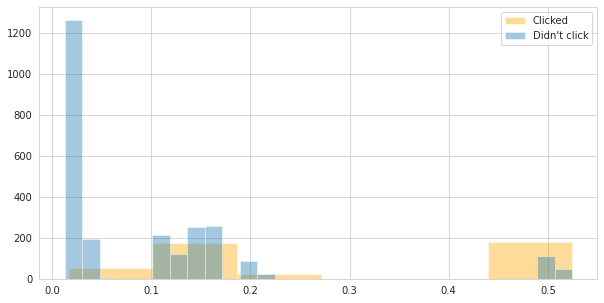

In [0]:
# sns.set()
f = plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
ax2 = sns.distplot(y_test_pred[y_test==1], color='orange', kde=False, label="Clicked")
ax1 = sns.distplot(y_test_pred[y_test==0], kde=False, label="Didn't click")
plt.legend()

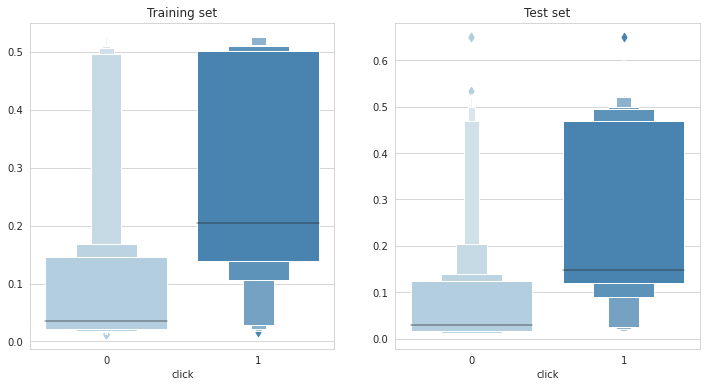

In [0]:
# sns.violinplot(x=y_test, y=y_pred_logi)
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.boxenplot(x=y_train, y=y_train_pred, palette="Blues", ax=ax[0])
ax[0].set_title('Training set')
sns.boxenplot(x=y_test, y=y_test_pred, palette="Blues", ax=ax[1])
ax[1].set_title('Test set')
plt.show()

In [0]:
threshold = .2
y_pred_prob = y_test_pred
y_pred = y_pred_prob > threshold
print('Prob of clicking:', np.mean(y_test), np.mean(y_pred))
print('Log loss:', log_loss(y_test, y_pred_prob))
print('Accuracy score:', accuracy_score(y_test, y_pred))
print("Recall rate:", recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print('AUC metric:', auc(fpr, tpr))

Prob of clicking: 0.144 0.11433333333333333
Log loss: 0.3335068365468954
Accuracy score: 0.8623333333333333
Recall rate: 0.41898148148148145
AUC metric: 0.8018886292834891


# Predict prob of sale given click

# CorEx analysis

In [0]:
!git clone https://github.com/gregversteeg/CorEx.git

Cloning into 'CorEx'...
remote: Enumerating objects: 68, done.
remote: Total 68 (delta 0), reused 0 (delta 0), pack-reused 68
Unpacking objects: 100% (68/68), done.


In [0]:
import sys
sys.path.append("/content/CorEx/")
import corex as ce

In [0]:
df = df[['currently_insured', 'number_of_vehicles', 'number_of_drivers', 'married', 'rank', 'click', 'policies sold']]

In [0]:
df['number_of_vehicles'] = df['number_of_vehicles']-1 
df['number_of_drivers'] = df['number_of_drivers'] - 1

In [0]:
X = df.iloc[:,:4].to_numpy()
y = df['click']

In [0]:
layer1 = ce.Corex(n_hidden=3)  # Define the number of hidden factors to use.
layer1.fit(X)

layer1.clusters  # Each variable/column is associated with one Y_j
# # array([0, 0, 0, 1, 1])
# layer1.labels[0]  # Labels for each sample for Y_0
# # array([0, 0, 1, 1])
# layer1.labels[1]  # Labels for each sample for Y_1
# # array([0, 1, 0, 1])
# layer1.tcs  # TC(X;Y_j) (all info measures reported in nats). 
# # array([ 1.385,  0.692])
# # TC(X_Gj) >=TC(X_Gj ; Y_j)
# # For this example, TC(X1,X2,X3)=1.386, TC(X4,X5) = 0.693

array([2, 1, 0, 0])

In [0]:
layer1.labels

array([[1, 0, 1],
       [1, 1, 1],
       [0, 0, 0],
       ...,
       [1, 1, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(layer1.labels, y, 
                                                    test_size = .3, 
                                                    random_state = 9)

In [0]:
logi = LogisticRegression().fit(X_train, y_train)

In [0]:
threshold = .27
y_pred_logi = logi.predict_proba(X_test)[:,1]
y_pred_prob = y_pred_logi
y_pred = y_pred_prob > threshold
print('Prob of clicking:', np.mean(y_test), np.mean(y_pred))
print('Log loss:', log_loss(y_test, y_pred_prob))
print('Accuracy score:', accuracy_score(y_test, y_pred))
print("Recall rate:", recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print('AUC metric:', auc(fpr, tpr))

Prob of clicking: 0.126 0.24633333333333332
Log loss: 0.3481374122737
Accuracy score: 0.747
Recall rate: 0.47354497354497355
AUC metric: 0.7063688811400481


# Nonlinear Logistic Regression

In [0]:
df['transformed_rank'] = np.exp(.1*(5-df['rank']))

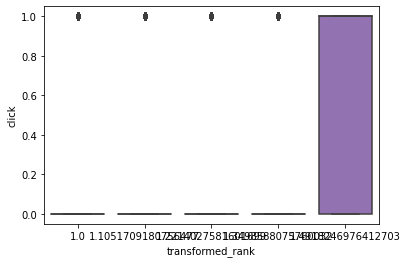

In [0]:
sns.boxplot(df['transformed_rank'], df['click'])

In [0]:
X_trian, X_test, y_train, y_test = train_test_split(df[['transformed_rank', 'currently_insured', 'number_of_vehicles', 
                                                        'number_of_drivers','married']], df['click'], 
                                                    test_size=.3, 
                                                    random_state = 9)

In [0]:
logi_clf = LogisticRegression().fit(X_trian, y_train)

In [0]:
model = logi_clf
threshold = .28
y_pred_prob = model.predict_proba(X_test)[:,1]
y_pred = y_pred_prob > threshold
print('Prob of clicking:', np.mean(y_test), np.mean(y_pred))
print('Log loss:', log_loss(y_test, y_pred_prob))
print('Accuracy score:', accuracy_score(y_test, y_pred))
print("Recall rate:", recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print('AUC metric:', auc(fpr, tpr))

Prob of clicking: 0.126 0.112
Log loss: 0.3070209363571056
Accuracy score: 0.876
Recall rate: 0.4523809523809524
AUC metric: 0.7979742028178336


# Matrix Completion

In [0]:
!git clone https://github.com/iskandr/fancyimpute

Cloning into 'fancyimpute'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 1044 (delta 0), reused 0 (delta 0), pack-reused 1041
Receiving objects: 100% (1044/1044), 261.77 KiB | 6.89 MiB/s, done.
Resolving deltas: 100% (708/708), done.


In [0]:
sys.path.append("/content/fancyimpute/")

In [0]:
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler, IterativeImputer, IterativeSVD, MatrixFactorization, BiScaler
# X is the complete data matrix
# X_incomplete has the same values as X except a subset have been replace with NaN


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
Using TensorFlow backend.


In [0]:
# Doesn't even fill in the NANs 
# prob_click_fillna = BiScaler().fit_transform(actual_prob_click)

In [0]:
# Works! 
prob_click_fillna = MatrixFactorization().fit_transform(actual_prob_click)
prob_sale_fillna = MatrixFactorization().fit_transform(actual_prob_sale)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 52 samples, validate on 6 samples
Epoch 1/10000
52/52 [==============================] - 0s 6ms/step - loss: 1.0018 - val_loss: 2.5237
Epoch 2/10000
52/52 [==============================] - 0s 95us/step - loss: 0.9938 - val_loss: 2.5293
Epoch 3/10000
52/52 [==============================] - 0s 47us/step - loss: 0.9887 - val_loss: 2.5342
Epoch 4/10000
52/52 [==============================] - 0s 55us/step - loss: 0.9842 - val_loss: 2.5390
Epoch 5/10000
52/52 [==============================] - 0s 55us/step - loss: 0.9799 - val_loss: 2.5438
Epoch 6/10000
52/52 [==============================] - 0s 57us/step - loss: 0.9756 - val_loss: 2.5487


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 52 samples, validate on 6 samples
Epoch 1/10000
52/52 [==============================] - 0s 2ms/step - loss: 1.1204 - val_loss: 0.6936
Epoch 2/10000
52/52 [==============================] - 0s 71us/step - loss: 1.1152 - val_loss: 0.6935
Epoch 3/10000
52/52 [==============================] - 0s 56us/step - loss: 1.1113 - val_loss: 0.6934
Epoch 4/10000
52/52 [==============================] - 0s 73us/step - loss: 1.1071 - val_loss: 0.6932
Epoch 5/10000
52/52 [==============================] - 0s 66us/step - loss: 1.1031 - val_loss: 0.6931
Epoch 6/10000
52/52 [==============================] - 0s 64us/step - loss: 1.0995 - val_loss: 0.6930


In [0]:
# Works!
prob_click_fillna = IterativeImputer().fit_transform(actual_prob_click)

In [0]:
# Works! 
prob_click_fillna = KNN().fit_transform(actual_prob_click)
prob_sale_fillna = KNN().fit_transform(actual_prob_sale)

Imputing row 1/16 with 1 missing, elapsed time: 0.001
Imputing row 1/16 with 1 missing, elapsed time: 0.001


In [0]:
# Not working well 
# prob_click_fillna = SoftImpute().fit_transform(actual_prob_click)

In [0]:
# Not working well
prob_click_fillna = NuclearNormMinimization().fit_transform(actual_prob_click)

In [0]:
pd.DataFrame(data=prob_click_fillna).to_csv("/content/drive/My Drive/Colab Notebooks/prob_click.csv")

In [0]:
pd.DataFrame(data=prob_sale_fillna).to_csv("/content/drive/My Drive/Colab Notebooks/prob_sale.csv")

In [0]:
prob_sale_fillna

array([[0.28571429, 0.2       , 0.        , 0.        , 0.00458743],
       [0.2866242 , 0.11794872, 0.06329114, 0.03184713, 0.00275924],
       [0.26950355, 0.1091954 , 0.08849558, 0.02674384, 0.00660389],
       [0.22508039, 0.07453416, 0.01459854, 0.00375478, 0.00652721],
       [0.24662651, 0.10469536, 0.04761905, 0.03030303, 0.        ],
       [0.26570065, 0.12109625, 0.08108108, 0.0126183 , 0.01288404],
       [0.22614346, 0.07216495, 0.0375    , 0.01550388, 0.01020408],
       [0.2606909 , 0.07526882, 0.03846154, 0.        , 0.        ],
       [0.36363636, 0.25      , 0.        , 0.07142857, 0.0038927 ],
       [0.22077922, 0.04411765, 0.07589286, 0.02631579, 0.0042156 ],
       [0.14953271, 0.05027933, 0.0273224 , 0.00847458, 0.00485324],
       [0.12621359, 0.03680982, 0.04639175, 0.00746269, 0.002155  ],
       [0.27697804, 0.08449748, 0.11764706, 0.        , 0.        ],
       [0.29438282, 0.13491515, 0.03209877, 0.01644737, 0.00862895],
       [0.23823956, 0.03448276, 0.

In [0]:
actual_prob_click

array([[0.57142857, 0.2       , 0.1       , 0.        ,        nan],
       [0.50955414, 0.21538462, 0.14767932, 0.03821656,        nan],
       [0.5141844 , 0.20689655, 0.19469027,        nan,        nan],
       [0.48874598, 0.16149068, 0.08759124,        nan,        nan],
       [       nan,        nan, 0.04761905, 0.12121212, 0.01754386],
       [       nan,        nan, 0.16756757, 0.03154574, 0.02477701],
       [       nan, 0.17525773, 0.125     , 0.03100775, 0.01020408],
       [       nan, 0.19354839, 0.12307692, 0.03937008, 0.02298851],
       [0.63636364, 0.25      , 0.        , 0.07142857,        nan],
       [0.5       , 0.1372549 , 0.14732143, 0.05921053,        nan],
       [0.52336449, 0.18994413, 0.13661202, 0.05084746,        nan],
       [0.58252427, 0.20858896, 0.18556701, 0.03731343,        nan],
       [       nan,        nan, 0.29411765, 0.08      , 0.        ],
       [       nan,        nan, 0.16296296, 0.04605263, 0.01629914],
       [       nan, 0.13793103, 0.

In [0]:
prob_sale_fillna = NuclearNormMinimization().fit_transform(actual_prob_sale)

----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 747
eps = 1.00e-04, alpha = 1.50, max_iters = 50000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 391, constraints m = 551
Cones:	primal zero / dual free vars: 80
	linear vars: 240
	sd vars: 231, sd blks: 1
Setup time: 9.20e-03s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.29e+20  1.77e+20  1.00e+00 -4.47e+20  1.05e+20  1.77e+20  1.00e-02 
   100| 2.48e-03  6.19e-03  4.55e-04  1.20e+00  1.20e+00  5.39e-17  5.27e-02 
   200| 1.37e-03  3.02e-03  5.47e-04  1.20e+00  1.20e+00  1.08e-1

In [0]:
prob_sale_fillna

array([[0.28571429, 0.2       , 0.        , 0.        , 0.00366253],
       [0.2866242 , 0.11794872, 0.06329114, 0.03184713, 0.00738861],
       [0.26950355, 0.1091954 , 0.08849558, 0.01535519, 0.0056728 ],
       [0.22508039, 0.07453416, 0.01459854, 0.01540229, 0.00419158],
       [0.24765573, 0.08772737, 0.04761905, 0.03030303, 0.        ],
       [0.26577844, 0.13215672, 0.08108108, 0.0126183 , 0.01288404],
       [0.24239382, 0.07216495, 0.0375    , 0.01550388, 0.01020408],
       [0.23617074, 0.07526882, 0.03846154, 0.        , 0.        ],
       [0.36363636, 0.25      , 0.        , 0.07142857, 0.00982772],
       [0.22077922, 0.04411765, 0.07589286, 0.02631579, 0.00320366],
       [0.14953271, 0.05027933, 0.0273224 , 0.00847458, 0.00267985],
       [0.12621359, 0.03680982, 0.04639175, 0.00746269, 0.00656768],
       [0.26538179, 0.09142922, 0.11764706, 0.        , 0.        ],
       [0.21744599, 0.12585481, 0.03209877, 0.01644737, 0.00862895],
       [0.24896879, 0.03448276, 0.

In [0]:
actual_prob_sale

array([[0.28571429, 0.2       , 0.        , 0.        ,        nan],
       [0.2866242 , 0.11794872, 0.06329114, 0.03184713,        nan],
       [0.26950355, 0.1091954 , 0.08849558,        nan,        nan],
       [0.22508039, 0.07453416, 0.01459854,        nan,        nan],
       [       nan,        nan, 0.04761905, 0.03030303, 0.        ],
       [       nan,        nan, 0.08108108, 0.0126183 , 0.01288404],
       [       nan, 0.07216495, 0.0375    , 0.01550388, 0.01020408],
       [       nan, 0.07526882, 0.03846154, 0.        , 0.        ],
       [0.36363636, 0.25      , 0.        , 0.07142857,        nan],
       [0.22077922, 0.04411765, 0.07589286, 0.02631579,        nan],
       [0.14953271, 0.05027933, 0.0273224 , 0.00847458,        nan],
       [0.12621359, 0.03680982, 0.04639175, 0.00746269,        nan],
       [       nan,        nan, 0.11764706, 0.        , 0.        ],
       [       nan,        nan, 0.03209877, 0.01644737, 0.00862895],
       [       nan, 0.03448276, 0.

# Test -- predicting random behavior

In [0]:
y_rand = np.random.rand(2000)

In [0]:
X_rand = np.concatenate( (np.ones(1000), 2*np.ones(1000)), axis=None )

In [0]:
y_rand = y_rand + np.concatenate( (np.zeros(1000), .2*np.ones(1000)), axis=None)

In [0]:
np.mean(y_rand[:1000])

0.5078943436589745

In [0]:
y_outcome = (y_rand>0.5)

In [0]:
np.mean(y_rand[1000:])

0.6969078289292732

In [0]:
logi = LogisticRegression().fit(X_rand.reshape(2000,-1), y_outcome.reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
y_test = logi.predict_proba(X_rand.reshape(2000,-1))

In [0]:
log_loss(y_outcome, y_test)

0.6549136080415956

In [0]:
np.mean(y_test[:1000])

0.5

In [0]:
print(np.mean(y_test[1000:]),np.mean( y_outcome[1000:]))

0.5000000000000001 0.693


In [0]:
X_rand.reshape(2000,-1)

array([[1.],
       [1.],
       [1.],
       ...,
       [2.],
       [2.],
       [2.]])

In [0]:
logi.predict_proba(np.array([[1.]]))

array([[0.49819722, 0.50180278]])